In [1]:
import pandas as pd
df = pd.read_csv('mall customers.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dropping CustomerID column

In [4]:
df.drop('CustomerID', axis = 1, inplace = True)

In [5]:
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40

Encoding Gender Column

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
df.Gender = le.fit_transform(df.Gender)

In [8]:
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40

Renaming income and score column

In [9]:
df.rename(columns = {'Annual Income (k$)': 'income', 'Spending Score (1-100)' : 'score'}, inplace=True)

In [10]:
df.head()

Gender  Age  income  score
0       1   19      15     39
1       1   21      15     81
2       0   20      16      6
3       0   23      16     77
4       0   31      17     40

# KMeans Cluster Algorithm

Before Tuning

In [11]:
from sklearn.cluster import KMeans
kmean1 = KMeans()

In [12]:
df['clusters'] = kmean1.fit_predict(df[['Gender', 'Age', 'income', 'score']])

In [13]:
centroid1 = kmean1.cluster_centers_
centroid1

array([[  0.46428571,  32.78571429,  78.03571429,  81.89285714],
       [  0.43181818,  56.34090909,  53.70454545,  49.38636364],
       [  0.35135135,  27.10810811,  56.2972973 ,  49.67567568],
       [  0.40909091,  25.27272727,  25.72727273,  79.36363636],
       [  0.40909091,  44.31818182,  25.77272727,  20.27272727],
       [  0.3       ,  41.        , 109.7       ,  22.        ],
       [  0.45454545,  32.45454545, 108.18181818,  82.72727273],
       [  0.65384615,  41.23076923,  79.26923077,  15.92307692]])

In [14]:
df.head()

Gender  Age  income  score  clusters
0       1   19      15     39         4
1       1   21      15     81         3
2       0   20      16      6         4
3       0   23      16     77         3
4       0   31      17     40         4

# Optimal Number of Cluster with Elbow method

Method 1

In [15]:
wcss = []

cluster1 = range(1, 15)

for k in cluster1:
    kmean2 = KMeans(n_clusters=k)
    kmean2.fit(df[['Gender', 'Age', 'income', 'score']])
    wcss.append(kmean2.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
wcss

[308862.06000000006,
 212889.44245524294,
 143391.59236035674,
 104414.67534220174,
 75427.71182424152,
 58348.64136331505,
 51130.690081263754,
 44391.82080487078,
 40956.77989342179,
 37088.93260325826,
 34324.41951777469,
 32391.954271911658,
 29980.460964753624,
 27987.60463777707]

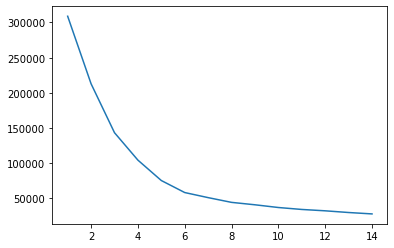

In [17]:
import matplotlib.pyplot as plt
plt.plot(cluster1, wcss)

Method 2(with 3rd party)

In [18]:
from kneed import KneeLocator
kl = KneeLocator(cluster1, wcss, curve='convex', direction='decreasing')

In [19]:
kl.knee

5

After tuning

In [20]:
kmean2 = KMeans(n_clusters=5)
df['new_clusters'] = kmean2.fit_predict(df[['Gender', 'Age', 'income', 'score']])

In [21]:
centroid2 = kmean2.cluster_centers_
centroid2

array([[ 0.4125    , 42.9375    , 55.0875    , 49.7125    ],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348]])